In [1]:
print("多分类问题....")

多分类问题....


In [2]:
from keras.datasets import reuters

In [3]:
load_data = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 20s 10us/step


In [4]:
(train_data, train_labels), (test_data, test_labels) = load_data

In [10]:
print('train_data -> %d, train_lable -> %d' %(len(train_data), len(train_labels)))
print('test_data -> %d, test_lable -> %d' %(len(test_data), len(test_labels)))

train_data -> 8982, train_lable -> 8982
test_data -> 2246, test_lable -> 2246


In [12]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(reverse_word_index.get(i - 3, "?") for i in train_data[0])
decoded_review

557056/550378 [==============================] - 10s 17us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [27]:
train_labels[10]

3

In [17]:
# 数据项量化
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, label in enumerate(sequences):
        results[i, label] = 1.
    return results

def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [51]:
# 定义模型
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [52]:
# 编译模型
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [53]:
# 验证  从训练集中留出数据作验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [54]:
# 训练模型
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 342us/step - loss: 2.1113 - acc: 0.5502 - val_loss: 1.3525 - val_acc: 0.6910
Epoch 2/20
7982/7982 [==============================] - 2s 301us/step - loss: 1.1029 - acc: 0.7497 - val_loss: 1.0947 - val_acc: 0.7480
Epoch 3/20
7982/7982 [==============================] - 2s 301us/step - loss: 0.7742 - acc: 0.8232 - val_loss: 0.9481 - val_acc: 0.7970
Epoch 4/20
7982/7982 [==============================] - 2s 303us/step - loss: 0.5374 - acc: 0.8831 - val_loss: 0.8815 - val_acc: 0.8210
Epoch 5/20
7982/7982 [==============================] - 2s 304us/step - loss: 0.3672 - acc: 0.9204 - val_loss: 0.9346 - val_acc: 0.8100
Epoch 6/20
7982/7982 [==============================] - 2s 304us/step - loss: 0.2906 - acc: 0.9357 - val_loss: 0.8848 - val_acc: 0.8190
Epoch 7/20
7982/7982 [==============================] - 2s 301us/step - loss: 0.2098 - acc: 0.9469 - val_loss: 0.8996 - val_acc: 0.8150


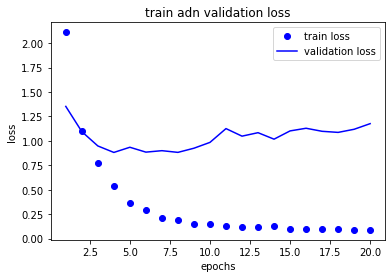

In [55]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'train loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('train adn validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()

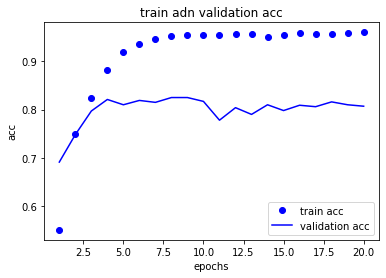

In [56]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'train acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('train adn validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

In [57]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 220us/step


[1.3956865134880359, 0.7845057881207521]

In [58]:
predictions = model.predict(x_test)
predictions[0]

array([9.1268402e-07, 2.8586624e-05, 2.1943649e-06, 9.7143698e-01,
       2.7918372e-02, 4.6741806e-09, 2.2163112e-08, 1.8843956e-08,
       2.1972340e-04, 1.2116782e-06, 4.9510900e-06, 5.8976166e-05,
       1.2712825e-07, 6.3840212e-06, 1.0448930e-07, 1.0270124e-09,
       3.8651756e-06, 9.4686152e-09, 7.8689489e-08, 1.0358144e-04,
       5.2508294e-05, 1.3512246e-04, 2.7259572e-09, 4.1004973e-06,
       5.0332464e-08, 1.4343875e-08, 4.7208759e-10, 2.0884929e-10,
       3.6898209e-07, 7.6253306e-09, 5.5150628e-07, 2.1792573e-10,
       4.1800627e-07, 8.4024672e-09, 4.7335786e-07, 1.9750358e-07,
       1.9661131e-05, 2.4639998e-08, 2.8894920e-07, 1.7642527e-08,
       2.2261871e-08, 7.0864148e-10, 8.4049634e-10, 8.2029771e-08,
       6.8437485e-11, 1.5575638e-10], dtype=float32)

In [59]:
np.sum(predictions[0])

0.99999994

In [60]:
np.argmax(predictions[0])

3